### Setting up the notebook

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats
from scipy.stats import iqr
import statsmodels as sm


### Importing data

In [2]:
salaries_data = pd.read_csv('salary.csv')
salaries_data=salaries_data.rename(columns={'male':'gender'})
dict_name={0:'woman',1:'man'}
salaries_data['gender']=salaries_data.gender.map(dict_name)
dict_name={1:'junior',2:'manager',3:'executive'}
salaries_data['position']=salaries_data.position.map(dict_name)


salaries_data.head()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,gender,Field,yearsabs
0,53000.0,0,0,0,1.17,1,0,junior,man,3,0
1,58000.0,1,0,0,1.24,1,0,junior,man,2,0
2,45500.0,0,0,0,1.21,1,0,junior,man,3,2
3,35782.0,0,2,1,0.99,1,0,junior,man,4,1
4,34731.0,0,2,2,0.91,1,0,junior,man,4,1


In [3]:
salaries_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514 entries, 0 to 513
Data columns (total 11 columns):
salary         513 non-null float64
exprior        514 non-null int64
yearsworked    514 non-null int64
yearsrank      514 non-null int64
market         514 non-null float64
degree         514 non-null int64
otherqual      514 non-null int64
position       514 non-null object
gender         514 non-null object
Field          514 non-null int64
yearsabs       514 non-null int64
dtypes: float64(2), int64(7), object(2)
memory usage: 44.3+ KB


*The data is collected from 514 people recording 11 features from each.*

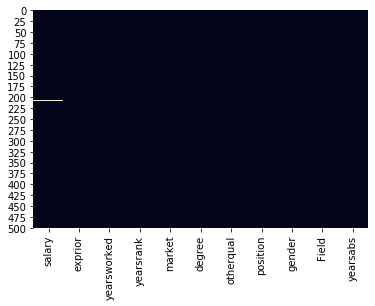

In [4]:
sns.heatmap(salaries_data.isnull(),cbar=False)

*There are missing values on salary column.*

#### Looking at the salary column

In [5]:
salaries_data['salary'].isnull()
missing_values=salaries_data[salaries_data.salary.isnull()==True]
print(missing_values)

     salary  exprior  yearsworked  yearsrank  market  degree  otherqual  \
208     NaN        0           21         10    0.93       1          0   

      position gender  Field  yearsabs  
208  executive    man      4         1  


In [6]:
salaries_data['salary']=salaries_data.salary.fillna(salaries_data.salary.mean())

*There is only one missing value of salary which is the 208th entry 
but all the other features about the employee are recorded which means it is viable 
keep the entry.*

In [7]:
salaries_data['salary'].max()
salaries_data['salary'].min()
salaries_data['salary'].mean()
stats.sem(salaries_data['salary'])
salaries_data['salary'].median()
iqr(salaries_data['salary'])
print('The lowest annual salary is' ,salaries_data['salary'].min(),
      'and the maximum annual salary is', salaries_data['salary'].max() ,'.',
      'The annual mean salary is',salaries_data['salary'].mean(),'.',
     'The standard error of annual salary mean is',stats.sem(salaries_data['salary']))

The lowest annual salary is 29000.0 and the maximum annual salary is 96156.0 . The annual mean salary is 50863.22009783625 . The standard error of annual salary mean is 558.9715980665014


In [8]:
x=salaries_data['gender'].value_counts()
gender=pd.DataFrame(x)
gender


,gender
man,386
woman,128


Text(0.5, 1.0, 'Total number of men and women')

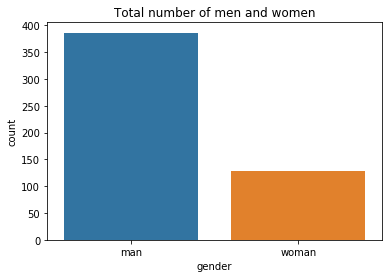

In [9]:
sns.countplot(x='gender',data=salaries_data)
plt.title('Total number of men and women')

In [10]:
y=salaries_data['position'].value_counts()
y

executive    211
manager      160
junior       143
Name: position, dtype: int64

In [22]:
len(salaries_data[(salaries_data.position=='executive')&(salaries_data.gender=='woman')])


19

In [23]:
len(salaries_data[(salaries_data.position=='executive')&(salaries_data.gender=='man')])

192

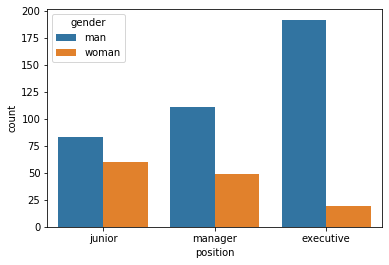

In [14]:
sns.countplot(x='position',hue='gender',data=salaries_data)

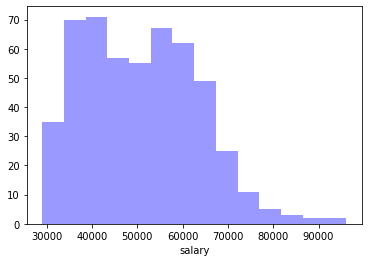

In [15]:

sns.distplot(salaries_data['salary'], kde=False, color='blue')

In [16]:
## how to interpret a histogram

In [24]:
male=salaries_data[salaries_data.gender=='man'].salary
male_mean=male.mean()
female=salaries_data[salaries_data.gender=='woman'].salary
female_mean=female.mean()

male_stdev=np.std(male)
female_stdev=np.std(female)

CTEs=[male_mean,female_mean]
error=[male_stdev,female_stdev]

In [25]:
sns.barplot(x="gender", y="salary", data=salaries_data,yerror=mean,alighn='center',
            alpha=0.5,ecolor='black',capsize=10)

NameError: name 'mean' is not defined